#  Visualizing Adoption and Return Trends in Sonoma Animal Data
03/15/2024

#### Rafael L.S. Reis, Dalia Cabrera Hurtado, Gabe Myers

## Introduction

This notebook explores trends in animal shelter outcomes and the factors that influence how long animals remain in care, using a Sonoma County dataset with over 30,000 records. The data includes key attributes such as breed, age, sex, and length of stay for dogs, cats, and other animals.

We investigate how animal characteristics, specifically breed type (purebred versus mixed), age, and sex—relate to shelter duration and overall outcomes. In our analysis, we examine several key aspects:

Outcome Differences: How the number of days an animal spends in the shelter varies between those that are adopted and those that are returned to their owners.
Breed Influence: How breed impacts shelter stays, noting that purebred dogs tend to have shorter stays, while breeds like pit bulls, which face negative stigma, often remain longer.
Age Effects: How shelter duration varies with age, with older animals tending to have shorter stays,possibly due to higher euthanasia rates while younger animals may require additional time to stabilize their health before adoption.
Sex Associations: How subtle differences in shelter duration may be linked to the sex of the animal, influencing adoption and return outcomes.
This analysis seeks to, amongst smaller questions, answer two key questions:

Outcome Comparison: How does the number of days an animal spends in the shelter differ between those that are adopted and those that are returned to their owners?
Characteristic Correlations: How do animal characteristics such as breed, age, and sex correlate with the length of their shelter stay?
By addressing these questions through a series of visualizations—including bar plots, scatter plots, and binned analyses—we aim to provide actionable insights that can inform strategies to improve adoption rates and reduce shelter overcrowding.

data downloaded from:
https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-15-october-2024.csv

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime # for age stuff

## Initial Data Exploration

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-17-march-2025.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30027 entries, 0 to 30026
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  22171 non-null  object 
 1   Type                  30027 non-null  object 
 2   Breed                 30027 non-null  object 
 3   Color                 30027 non-null  object 
 4   Sex                   30027 non-null  object 
 5   Size                  29991 non-null  object 
 6   Date Of Birth         22736 non-null  object 
 7   Impound Number        30027 non-null  object 
 8   Kennel Number         30019 non-null  object 
 9   Animal ID             30027 non-null  object 
 10  Intake Date           30027 non-null  object 
 11  Outcome Date          29906 non-null  object 
 12  Days in Shelter       30027 non-null  int64  
 13  Intake Type           30027 non-null  object 
 14  Intake Subtype        30027 non-null  object 
 15  Outcome Type       

In [23]:
df.describe()

,Days in Shelter,Outcome Zip Code,Count
count,30027.000000,25725.000000,30027.000000
mean,20.485430,95028.609096,0.993772
std,44.547567,3707.702826,0.078671
min,0.000000,1922.000000,0.000000
25%,1.000000,95401.000000,1.000000
50%,9.000000,95404.000000,1.000000
75%,25.000000,95425.000000,1.000000
max,3704.000000,99701.000000,1.000000


In [24]:
df.sample(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
21392,DOMINO,DOG,PARSON RUSS TER,WHITE/BROWN,Spayed,SMALL,01/01/2006,K19-034787,TX,A041060,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1
13005,NaN,DOG,MALTESE,WHITE,Unknown,SMALL,NaN,K17-026523,RECEIVING,A365189,...,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
8096,PHOEBE,CAT,DOMESTIC SH,CALICO/WHITE,Spayed,KITTN,04/30/2014,K14-009056,LOBBY,A307404,...,OVER THE COUNTER,ADOPTION,WALKIN,TREATABLE/REHAB,HEALTHY,COUNTY,COUNTY,95403.0,"95403(38.4716444, -122.7398255)",1
14425,*BUZZ LIGHTYEAR,CAT,DOMESTIC SH,BRN TABBY/WHITE,Neutered,SMALL,12/12/2016,K19-032491,CA02,A388024,...,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.294195, -122.670365)",1
25632,*NUTMEG,DOG,CHIHUAHUA SH,BROWN/GRAY,Female,SMALL,08/25/2009,K21-039447,DS56,A406460,...,FIELD,TRANSFER,MUTTVILLE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,COUNTY,OUT OF COUNTY,94103.0,"94103(37.772, -122.408735)",1


# Exploring some variable and graphs

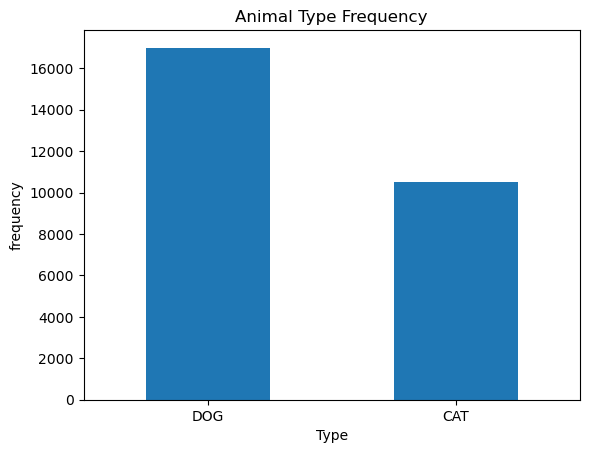

In [39]:
df['Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("frequency")
plt.title("Animal Type Frequency")
plt.show()

Text(0.5, 1.0, 'Outcome Types Frequency')

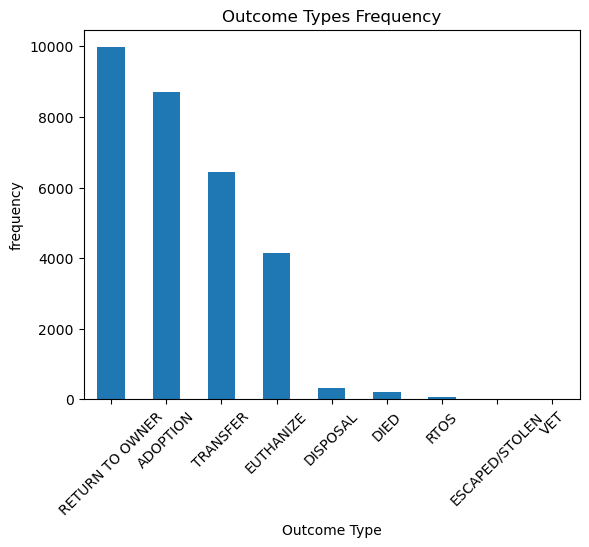

In [26]:
df['Outcome Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("frequency")
plt.title('Outcome Types Frequency')

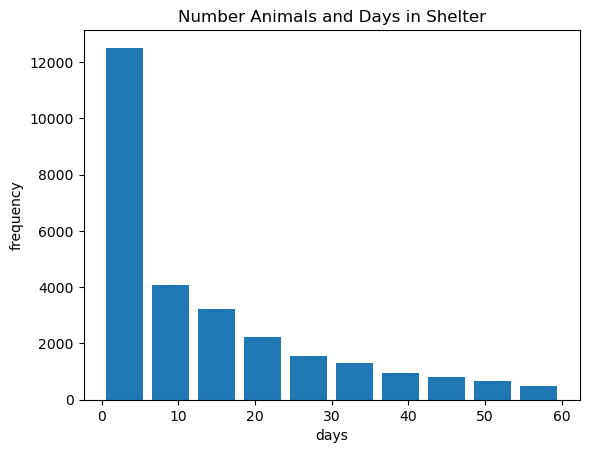

In [27]:
plt.hist(df['Days in Shelter'][df['Days in Shelter'] <= 60], rwidth=0.8)
plt.title('Number Animals and Days in Shelter')
plt.xlabel("days")
plt.ylabel("frequency")
plt.show()

## Data preprocessing

### Functions

In [28]:
# Function to extract primary breed
def get_primary_breed(breed_string):
    if pd.isna(breed_string):
        return "Unknown"
    
    breed_string = str(breed_string).strip()

    if '/' in breed_string:
        return breed_string.split('/')[0].strip() 
    
    # For breeds with "MIX" or similar suffix
    if 'MIX' in breed_string: # If mix is the primary 'breed'
        return breed_string.replace('MIX', '').strip()
   
    return breed_string

# Function to extract primary breed and treat any compound mix as just 'MIX'
def get_primary_breed_mix(breed_string):
    if pd.isna(breed_string):
        return "Unknown"
    
    breed = str(breed_string).strip()
    
    return 'MIX' if ('MIX' in breed or '/' in breed) else breed

# Function to calculate age in years using 'MM/DD/YYYY'
def calculate_age(dob_str):
    try:
        if pd.isna(dob_str) or dob_str == "":
            return np.nan
        dob = datetime.strptime(dob_str, '%m/%d/%Y')
        age_in_years = (current_date - dob).days / 365
        return age_in_years
    except:
        return np.nan

# Set a current date for age calculations
current_date = datetime.today()

### New Columns and Values

In [29]:
# ------- Columns/Filters for Breed and Days in Shelter Analysis ----------

# Create a new column for primary breed and primary breed with mix generalization
df['PrimaryBreed'] = df['Breed'].apply(get_primary_breed)
df['PrimaryBreedMix'] = df['Breed'].apply(get_primary_breed_mix)

# Separate dogs and cats
dog_df = df[df['Type'] == 'DOG'].copy()
cat_df = df[df['Type'] == 'CAT'].copy()

# Count the most common dog breeds
dog_breed_counts = dog_df['PrimaryBreed'].value_counts()
most_common_dog_breeds = dog_breed_counts.head(10).index.tolist()

dog_breed_counts_mix = dog_df['PrimaryBreedMix'].value_counts()
most_common_dog_breeds_mix = dog_breed_counts_mix.head(10).index.tolist()

# Get average days for most common dog breeds
dog_breed_days = dog_df[dog_df['PrimaryBreed'].isin(most_common_dog_breeds)]
dog_avg_days = dog_breed_days.groupby('PrimaryBreed')['Days in Shelter'].mean().reindex(most_common_dog_breeds)

dog_breed_days_mix = dog_df[dog_df['PrimaryBreedMix'].isin(most_common_dog_breeds_mix)]
dog_avg_days_mix = dog_breed_days_mix.groupby('PrimaryBreedMix')['Days in Shelter'].mean().reindex(most_common_dog_breeds_mix)

# Count the most common cat breeds
cat_breed_counts = cat_df['PrimaryBreed'].value_counts()
most_common_cat_breeds = cat_breed_counts.head(10).index.tolist()

# Get average days for most common cat breeds
cat_breed_days = cat_df[cat_df['PrimaryBreed'].isin(most_common_cat_breeds)]
cat_avg_days = cat_breed_days.groupby('PrimaryBreed')['Days in Shelter'].mean().reindex(most_common_cat_breeds)

In [30]:
# # ------- Columns/Filters for Age and Days in Shelter Analysis ----------

# Calculate Age w/ Function
df['Age'] = df['Date Of Birth'].apply(calculate_age)

# create an AgeBin column
age_min = int(np.floor(df['Age'].min()))
age_max = int(np.ceil(df['Age'].max()))
bins = np.arange(age_min, age_max + 1, 1)
# Use midpoints of the bins for labeling the x-axis
age_labels = (bins[:-1] + bins[1:]) / 2

# Create a new column with binned ages
df['AgeBin'] = pd.cut(df['Age'], bins=bins, labels=age_labels, include_lowest=True)

#Filter for Cats and Dogs Only
df_animals = df.copy()
filtered_df = df_animals[df_animals['Type'].isin(['CAT', 'DOG'])]

# Group by AgeBin to Compute Average Days in Shelter
combined_avg_days = filtered_df.groupby('AgeBin', observed=False)['Days in Shelter'].mean().reset_index() # warning told me to set observed to false?

combined_avg_days['AgeBin'] = combined_avg_days['AgeBin']
combined_avg_days = combined_avg_days.sort_values('AgeBin')

## Data exploration and visualization.

### Effects of Breed on Days in Shelter for Dog and Cats

The question we wish to answer is if there's adoption or retrieval biases towards certain breeds. 

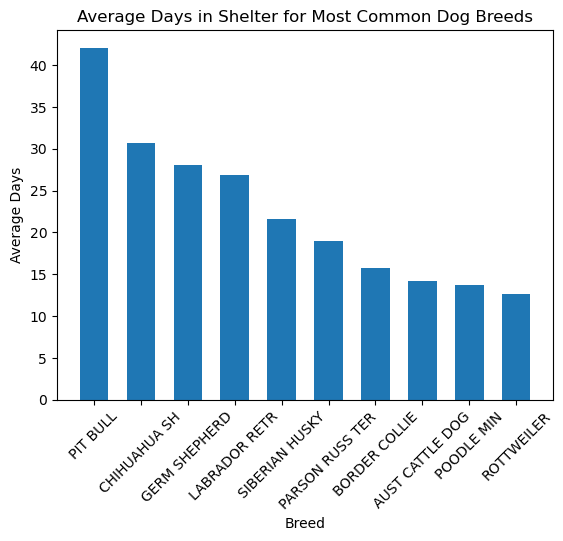

In [31]:
# Plot 1.1: Most Common Dog breeds by average days in shelter
sorted_dog_avg_days = dog_avg_days.sort_values(ascending=False)

plt.bar(dog_avg_days.index, sorted_dog_avg_days.values, width=0.6)
plt.title('Average Days in Shelter for Most Common Dog Breeds')
plt.xlabel('Breed')
plt.xticks(rotation=45) 
plt.ylabel('Average Days')
plt.show()

In the graph above, we observe that certain breeds such as Poodles, Australian Cattle Dogs, and Rottweilers tend to have shorter shelter stays. This is probably due their popularity and the higher likelihood of them being runaways, as it is rare to find these breeds as strays. For mixed-breed dogs, we designate the primary breed as the first one listed (i.e., the dominant breed). Notably, Pitbulls exhibit significantly longer shelter stays compared to other breeds. As we will explore further in the graph below, this trend may be due to several factors, including the high likelihood that many Pitbulls are mixed breeds and the challenges associated with owning them.

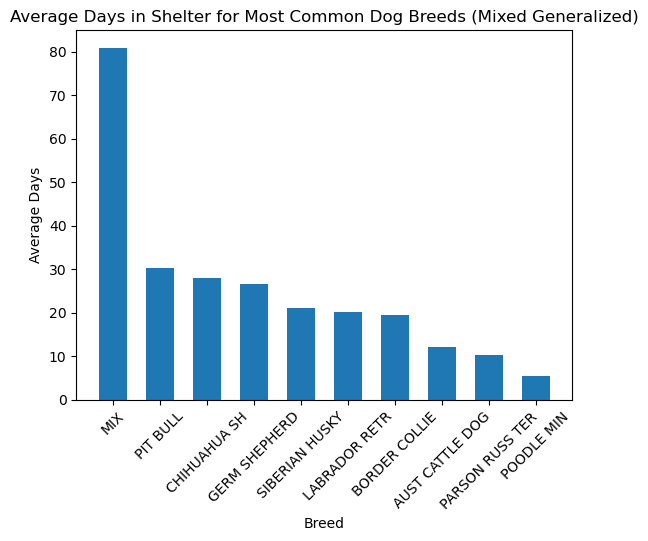

In [32]:
# Plot 1.2: Most Common Dog breeds by average days in shelter, generalizing mixed breeds
sorted_dog_avg_days_mix = dog_avg_days_mix.sort_values(ascending=False)

plt.bar(dog_avg_days_mix.index, sorted_dog_avg_days_mix.values, width=0.6)
plt.title('Average Days in Shelter for Most Common Dog Breeds (Mixed Generalized)')
plt.xlabel('Breed')
plt.xticks(rotation=45) 
plt.ylabel('Average Days')
plt.show()

On the graph above, we made a wide generalization for mixed breeds. We revised our filtering system so that any animal labeled as mixed or with more than one breed is classified as 'MIX'. With this update, the data presents a more accurate picture. Notably, while Pitbulls now show a shorter stay than before, they still remain in the shelter longer than most purebreds—likely reflecting the challenges associated with owning a breed that often faces public stigma. Mixed breed dogs, however, continue to stay much longer. This trend likely stems from persistent biases since many potential adopters still view mixed breeds as having unpredictable temperaments or uncertain health histories, even though mixed breeds can benefit from greater genetic diversity and fewer inherited issues.

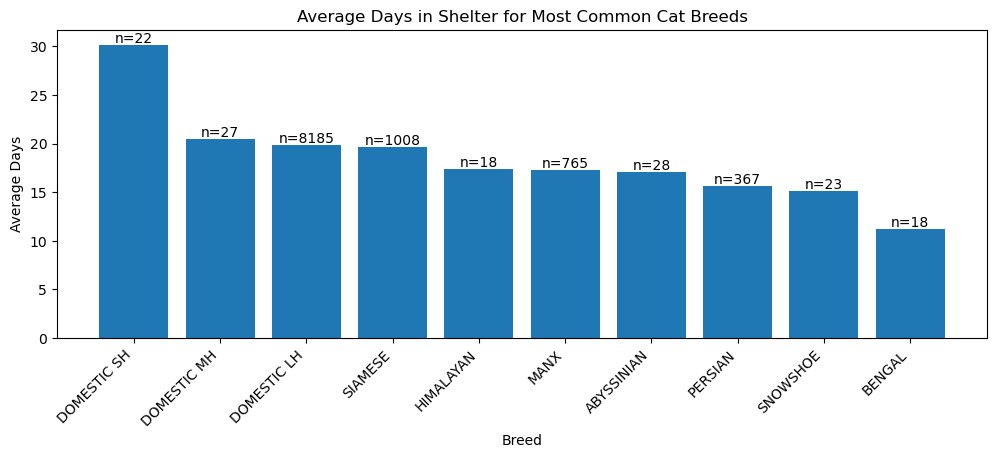

In [33]:
# Plot 2: Most Common Cat breeds by average days in shelter
sorted_cat_avg_days = cat_avg_days.sort_values(ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(cat_avg_days.index, sorted_cat_avg_days.values)
plt.title('Average Days in Shelter for Most Common Cat Breeds')
plt.xlabel('Breed')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Average Days')

# adding count labels -  I think it is important to show this in the cat scenario since there's some low \'n\' values
for i, breed in enumerate(sorted_cat_avg_days.index):
    plt.text(i, sorted_cat_avg_days[breed] + 0.25, f"n={cat_breed_counts[breed]}", ha='center')

plt.show()

Although some cat breeds have low sample sizes, which may affect reliability, the analysis suggests that domestic breeds refferring to undefined or mixed breeds (sometimes labeled as 'Siamese' based on coloration rather than true lineage)tend to have a slightly higher average number of days in the shelter than rarer, more defined breeds like Persians. This discrepancy might be influenced by the possibility that Persians, Himalayans, and Manxes are more likely to be runaways, as these breeds are not typically common street cats.

Overall, the data suggest that undefined and mixed breeds tend to remain in shelters longer, although this trend is less pronounced among cats. This may be because these animals are often perceived as less desirable, whereas purebreds are more likely to have an owner or, if unowned, are considered more attractive for adoption.

### Effects of Age and Days in Shelter

In order to further explore the relationship between an animal's age and its time spent in the shelter. The question we want to answer here is, do certain age ranges stay longer and if so why?

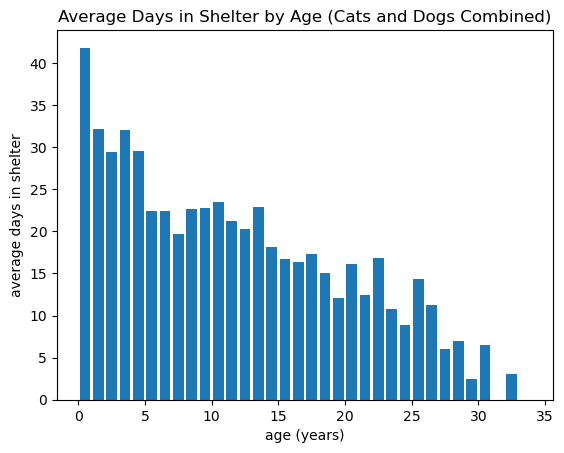

In [34]:

plt.bar(combined_avg_days['AgeBin'], combined_avg_days['Days in Shelter'])
plt.xlabel('age (years)')
plt.ylabel('average days in shelter')
plt.title('Average Days in Shelter by Age (Cats and Dogs Combined)')
plt.show()

Overall, the graph indicates a clear trend, older cats and dogs tend to spend less time in the shelter. One possible explanation for this pattern is that older animals may be more likely to be euthanized if they are not adopted, which shortens their shelter stay. Conversely, younger animals remain in the shelter longer, possibly because there are simply more individuals in these age ranges and very young animals may require extra time to stabilize their health before being adopted.

### Effects of Size and Days in Shelter

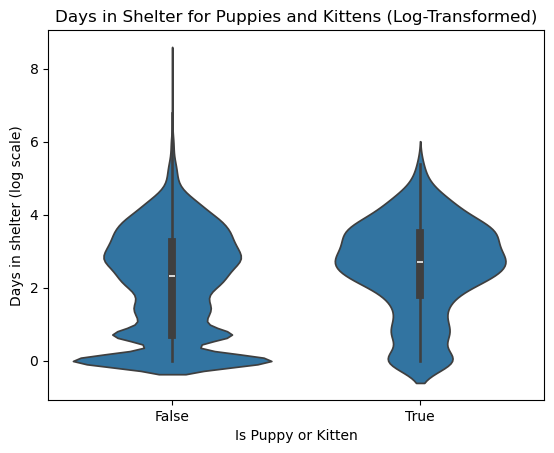

In [35]:
# create a new column to tell if an animal is a puppy or kitten
df["is_puppy_kitten"] = (df["Size"] == "KITTEN") | (df["Size"] == "PUPPY")
# create new column for log and use log1p to handle zeros
df["Days in Shelter_log"] = np.log1p(df["Days in Shelter"]) 
sns.violinplot(x="is_puppy_kitten", y="Days in Shelter_log", data=df)
plt.title("Days in Shelter for Puppies and Kittens (Log-Transformed)")
plt.xlabel("Is Puppy or Kitten")
plt.ylabel("Days in shelter (log scale)")
plt.show();

These two distributions look pretty simialar execept there is a spike close to 0 for non puppies and kittens. I think this is from peoples animals getting picked up off the street and returned to the owner.

Outcome:

I want to know how outcome type changes the duration an animal would stay. What outcome type has the longest stay on average?

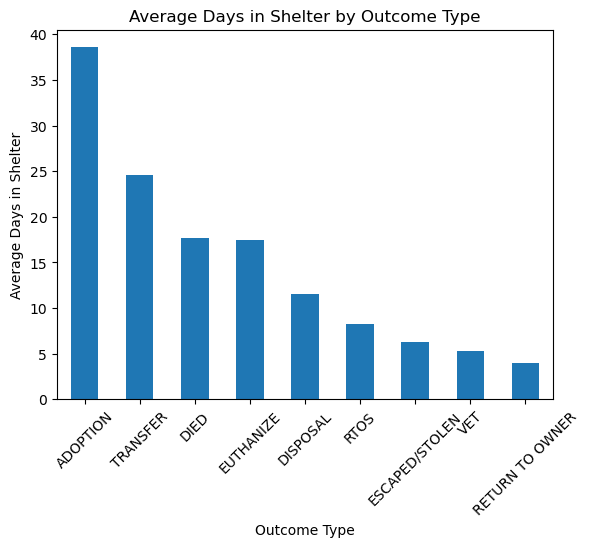

In [36]:
df.groupby("Outcome Type")["Days in Shelter"].mean().sort_values(ascending=False).plot.bar()
plt.xlabel("Outcome Type")
plt.ylabel("Average Days in Shelter")
plt.title("Average Days in Shelter by Outcome Type")
plt.xticks(rotation=45)
plt.show()

As we can see adopted animals stay the longest with an average of 40 days. This suggests that adoption is a proccess and takes time. I would also assume that the shelter staff are trying to find the best match possible for each dog so some people might get turned away.
Another interesting thing to note is how quickly animals get returned to their owner on average its about 4 days.

### Days in shelter as it relates to animal type.

/var/folders/jr/xmjf4jsn7qs69fq20lfl_p_c0000gn/T/ipykernel_18435/3299137420.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**3)


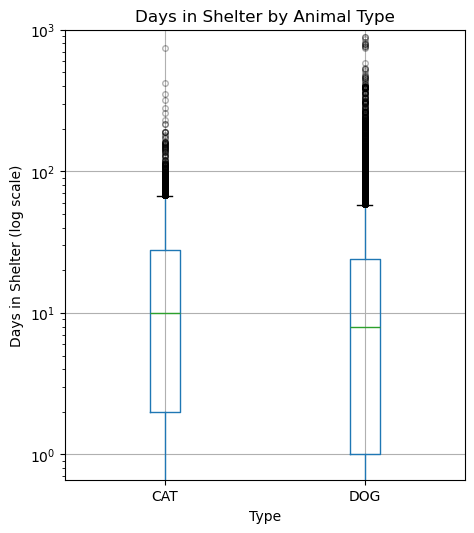

In [37]:
df_filtered = df[df['Type'].str.lower() != 'other']
flierprops = dict(marker='o', markersize=4,alpha=0.3, markerfacecolor ='none')
df_filtered.boxplot(column='Days in Shelter', by='Type', figsize=(5,6), flierprops=flierprops)
plt.yscale('log')  # Use log scale for skewed data
plt.ylim(0, 10**3)
plt.ylabel('Days in Shelter (log scale)')
plt.title('Days in Shelter by Animal Type')
plt.suptitle('')
plt.show();

The “Days in Shelter by Animal Type” plot tells us that the majority of animals stay 1 - 30 days.
This plot didn’t provide any significant findings but it is interesting that dogs have a median stay of around 8 days while cats have a slightly higher stay of 10 days. There were a lot of outliers in the dataset which can bring interesting questions like why are these animals staying for such lengths?

### Days in shelter as it relates to sex and animal type.

/var/folders/jr/xmjf4jsn7qs69fq20lfl_p_c0000gn/T/ipykernel_18435/2096495062.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim(0, 10**3)
/var/folders/jr/xmjf4jsn7qs69fq20lfl_p_c0000gn/T/ipykernel_18435/2096495062.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim(0, 10**3)


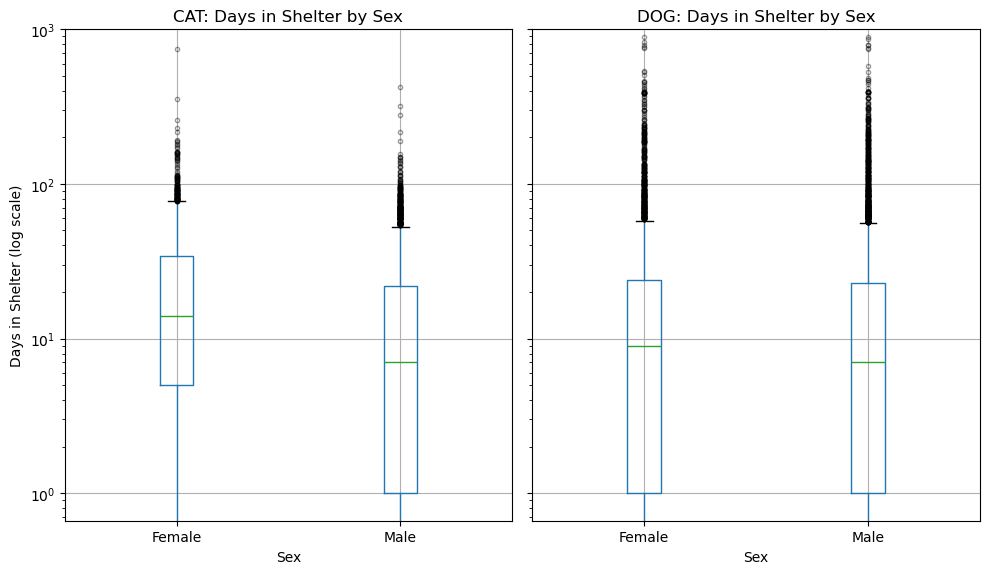

In [38]:
df = df[df['Type'].str.lower().isin(['cat', 'dog'])]

df['sex_binary'] = df['Sex'].apply(
    lambda s: 0 if ('female' in s.lower() or 'spay' in s.lower()) else 1
)
flierprops = dict(
    marker='o',
    markersize=3,
    markerfacecolor='none',
    alpha=0.4,
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)

df_cat = df[df['Type'].str.lower() == 'cat']
df_cat.boxplot(
    column='Days in Shelter',
    by='sex_binary',
    ax=axes[0],
    flierprops=flierprops
)

axes[0].set_yscale('log')
axes[0].set_ylim(0, 10**3)
axes[0].set_title('CAT: Days in Shelter by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Days in Shelter (log scale)')
axes[0].set_xticklabels(['Female', 'Male'])

df_dog = df[df['Type'].str.lower() == 'dog']
df_dog.boxplot(
    column='Days in Shelter',
    by='sex_binary',
    ax=axes[1],
    flierprops=flierprops
)

axes[1].set_yscale('log')
axes[1].set_ylim(0, 10**3)
axes[1].set_title('DOG: Days in Shelter by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Female', 'Male'])
plt.suptitle('')
plt.tight_layout()
plt.show()

The “Days in Shelter by Sex” plots shows that both female cats and dogs have a slightly higher median stay than male cats and dogs. This leads me to believe that sex of the animal might have an association to role in shelter duration. Female cats have the highest median stay followed by female dogs. Both male cats and dogs have similar median stays.

## Conclusion

Our analysis of Sonoma County animal shelter data revealed significant differences in the length of stay for animals based on breed, outcome, and age. Purebred dogs like poodles, Australian cattle dogs, and border collies tended to have the shortest stays, likely because their breeds are perceived as more valuable and have a higher chance of being recovered as runaway pets. In contrast, pit bulls experienced the longest average stays, possibly due to negative stigma and their common presence as strays. These examples clearly demonstrate that breed plays a significant role in determining shelter duration.

We also observed a clear distinction in stay duration based on outcome. Animals returned to their owners had the shortest shelter stays, likely because their owners were actively searching for them, while animals that were eventually adopted had the longest average stays, reflecting the longer process required to secure a new home.

In addition, our analysis of age revealed a distinct trend: older cats and dogs tend to spend less time in the shelter. One possible explanation is that older animals, especially dogs, might be more likely to be euthanized if they are not adopted, whereas younger animals remain longer, perhaps due to their higher numbers and the additional time needed to stabilize their health before adoption.

Overall, our findings also suggest that adopter preferences regarding sex and physical appearance, though sometimes subtle, further influence shelter stay durations. Animals perceived as less desirable tend to remain in the shelter longer when they are young, while older individuals in these categories may experience shorter stays. These insights provide valuable guidance for developing strategies to improve adoption rates and reduce shelter overcrowding, possibly rasing awareness on pets considered less desirable.